In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = "Mouse ID")

#Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check number of mice
num_mice = merge_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timpoint
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
#Create a clean Dataframe by dropping the duplicate mouse by its ID
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# checking the number of mice in clean DataFrame
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                          "Meadian Tumor Volume":median,
                          "Tumor Volume Variance":variance,
                          "Tumor Volume Std. Deviation":std,
                          "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'Mice Tested per Drug')

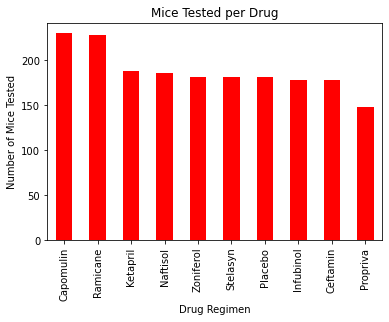

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

plot_pd = mice_count.plot.bar(color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Tested per Drug")

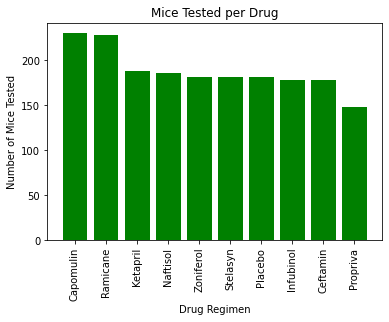

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='g', align='center')

plt.title("Mice Tested per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

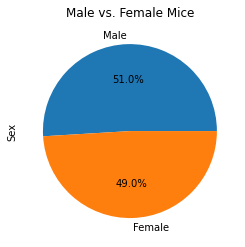

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_fem = clean_df["Sex"].value_counts()
plt.title("Male vs. Female Mice")
male_vs_fem.plot.pie(autopct = "%1.1f%%")
plt.show()

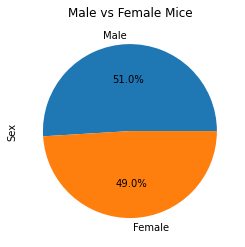

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.00, 51.00]
plot = male_vs_fem.plot.pie(y='Total Count', autopct = "%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merge_df[merge_df["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size = ("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

In [13]:
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size = ("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq - (1.5*iqr),2)
    
    if treatment == 0:
        print(f"//////////////////////////////////////////////////////////////")
        print(f"The lower quartile of {drug} treatments is: {lowerq}")
        print(f"The upper quartile of {drug} treatments is: {upperq}")
        print(f"The interquartile range of {drug} treatment is: {iqr}")
        print(f"Values below {lower_bound} may be{drug} outliers.")
        print(f"Values above {upper_bound} may be {drug} outliers.")
        print(f"//////////////////////////////////////////////////////////////")
        treatment+=1
        

//////////////////////////////////////////////////////////////
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatment is: 7.78
Values below 20.71 may beCapomulin outliers.
Values above 28.49 may be Capomulin outliers.
//////////////////////////////////////////////////////////////


<function matplotlib.pyplot.show(*args, **kw)>

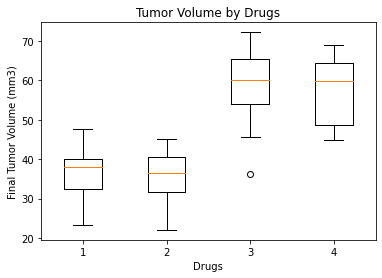

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_table = []
for drug in drug_list:
    boxplot_table.append(list(last_timepoint[drug].dropna()))
    
fig = plt.figure()
plt.xlabel("Drugs")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drugs")
plt.boxplot(boxplot_table)
plt.show

Text(0, 0.5, 'Tumor Volume (mm3)')

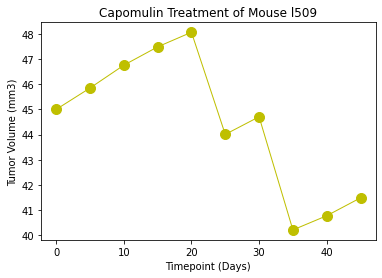

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

line_graph_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_graph_df.head()
x_axis = line_graph_df["Timepoint"]
y_axis = line_graph_df["Tumor Volume (mm3)"]

fig2, ax = plt.subplots()
plt.title('Capomulin Treatment of Mouse l509')
plt.plot(x_axis, y_axis, linewidth=1, markersize=10, marker="o", color="y", label = "Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

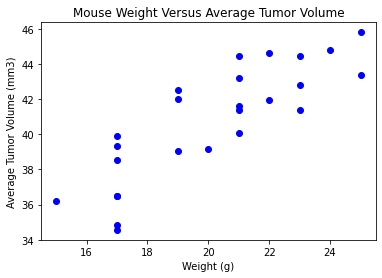

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig2, ax = plt.subplots()
avg_cap = capomulin_df.groupby(['Mouse ID']).mean()

marker_size = 10
plt.scatter(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'], color = "b")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse wieght and the average tumor volume is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

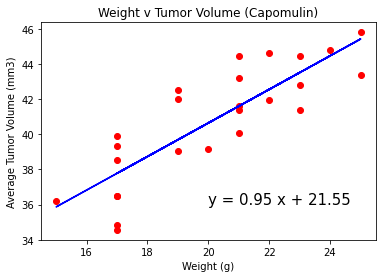

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor = st.pearsonr(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse wieght and the average tumor volume is {round(cor[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= linregress(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"])
reg_values = avg_cap["Weight (g)"]* slope + intercept
line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"],color = "r")
plt.plot(avg_cap["Weight (g)"], reg_values, color = "b")
plt.annotate(line, (20,36), fontsize = 15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight v Tumor Volume (Capomulin)")
plt.show